In [74]:
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
from skimage import io
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from PIL import Image,ImageOps
from sklearn.model_selection import train_test_split
import time
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from torch.nn import LeakyReLU,ReLU,Tanh,Sigmoid,Softmax
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error, mean_absolute_error,balanced_accuracy_score,brier_score_loss,cohen_kappa_score
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_recall_curve,confusion_matrix,precision_score,confusion_matrix,roc_auc_score,precision_score
from torch import optim
from tqdm.notebook import tqdm
from tqdm import trange
import albumentations as A
from albumentations.pytorch import ToTensor
import cv2

In [75]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(69)

(1024, 1024)


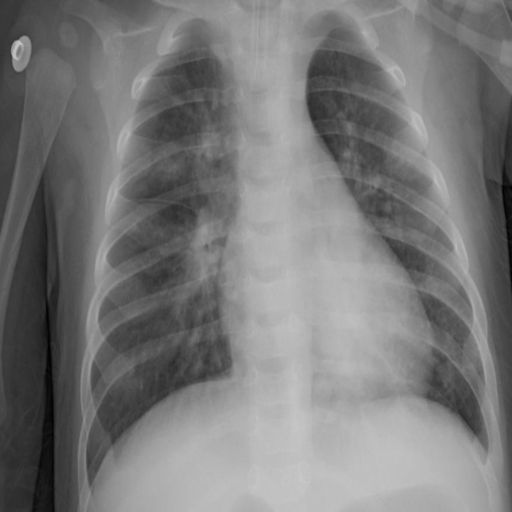

In [76]:
print(Image.open('data/COVID-19 (1).png').size)
transforms.Resize(size = (512,512))(Image.open('data/Viral Pneumonia (673).png'))

In [77]:
df = pd.read_csv('Some Meta.csv')
df

,Name,Labels
0,COVID-19 (1).png,1
1,COVID-19 (2).png,1
2,COVID-19 (3).png,1
3,COVID-19 (4).png,1
4,COVID-19 (5).png,1
...,...,...
2900,Viral Pneumonia (1341).png,2
2901,Viral Pneumonia (1342).png,2
2902,Viral Pneumonia (1343).png,2
2903,Viral Pneumonia (1344).png,2


In [78]:
new = df.sample(100)

In [79]:
os.getcwd()

'C:\\Users\\Amey.R\\Desktop\\Projects\\X-Ray\\COVID-19 Radiography Database'

In [80]:
os.mkdir('New Data')

In [81]:
os.listdir()

['.ipynb_checkpoints',
 'Albumentations.ipynb',
 'covid',
 'COVID-19.metadata.xlsx',
 'Custom Meta.csv',
 'data',
 'Data Generator.ipynb',
 'Good Looking Model 1',
 'labels.xlsx',
 'metadata.xlsx',
 'New Data',
 'normal',
 'NORMAL.metadata.xlsx',
 'README.md.txt',
 'Some Meta.csv',
 'test',
 'Transfer Example',
 'Trying Hard Model',
 'Trying Hard.ipynb',
 'Trying Transfer Learning.ipynb',
 'viral']

In [82]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    # transforms.GaussianBlur(kernel_size, sigma=(0.1, 2.0)),
    transforms.ColorJitter(contrast=25, saturation=30),
    transforms.RandomRotation(10)
    
])

In [83]:
n = []
c = []
for i in range(len(new)) : 
    name = new.iloc[i,0]
    cat = new.iloc[i, 1]
    img_path = os.path.join('data',name)
    img = Image.open(img_path)
    image = transform(img)
    # Save the image in new folder
    nn = 'New '+name
    n.append(nn)
    c.append(cat)
    image.save(os.path.join('New Data',nn), 'JPEG')


In [84]:
pd.DataFrame({'Name':n,'Label':c})

,Name,Label
0,New Viral Pneumonia (673).png,2
1,New Viral Pneumonia (27).png,2
2,New Viral Pneumonia (881).png,2
3,New Viral Pneumonia (1323).png,2
4,New NORMAL (1076).png,0
...,...,...
95,New Viral Pneumonia (318).png,2
96,New NORMAL (658).png,0
97,New Viral Pneumonia (842).png,2
98,New Viral Pneumonia (268).png,2


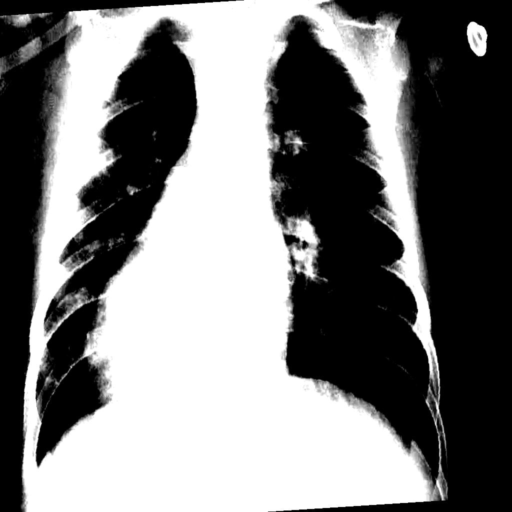

In [85]:
transforms.Resize(size = (512,512))(Image.open('New Data/New Viral Pneumonia (673).png'))

In [86]:
train_transform_alb = A.Compose([ToTensor(),
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.75),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225],always_apply=True)])

val_transform_alb = A.Compose([ToTensor(),
    A.Resize(224, 224),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225],always_apply=True)])